# Table of Contents for 6.4 Supervised Machine Learning Regression
    Import Libraries
    Set Path, Import File
    Data Checks
    Explore if heavier items cost more to ship
        Data clean
        Scatterplot
        Remove outliers, use histogram
        Descriptive statistics
        Perform linear regression
            Create arrays for modeling
            Split training and testing datasets
            Create model
            Fit linear regression and plot
            Predict
            Review summary statistics
            Compare the predicted values against the actual values
            Use model on test dataset and plot
            Compare training and testing results
    Results
        

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# Set Path

In [3]:
path = r'C:\Users\valev\Desktop\Achievement 6\0625 Ecommnerce Brazil'

# Import File

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders.pkl' ))

# Data Cleaning

In [5]:
df.shape

(103056, 42)

In [6]:
df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'serller_zip_code_prefix', 'order_deliverd_carrier_date',
       'ordered_deliv

In [7]:
df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  order_item_id  \
0                     8      99.330002              1   
1                     1      24.389999              1   
2                     1      65.709999              1   
3                     8     107.779999              1   
4                     2     128.449997              1   

                         product_id                         seller_id  \
0  af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1  a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2  2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   
3  548e5bfe28edceab6b51fa707cc9556f  da8622b14eb17ae2831f4ac5b9dab84a   
4  386486367c1f9d4f587a8864ccb6902b  cca3071e3e9bb7d12640c9fbe2301306   

  shipping_limit_date       price  ...                customer_unique_id  \
0 2018-05-02 22:15:00   79.800003  ...  708ab75d2a007f0564aedd11139c7708   
1 2018-07-02 11:18:00   17.000000  ...  a8b9d3a27068454b1c98cc67d4e31e6f   
2 2017-12-26 09:52:00   56.990002  ...  6f70c0b2f7552832ba46eb57b1c5651e   
3 2017-12-12 12:13:00   89.900002  ...  87695ed086ebd36f20404c82d20fca87   
4 2018-05-31 16:14:00  113.570000  ...  4291db0da71914754618cd789aebcd56   

  customer_zip_code_prefix  customer_city  customer_state  \
0                   -25735  teofilo otoni              MG   
1                     2422      sao paulo              SP   
2                     2652      sao paulo              SP   
3                   -29476   juiz de fora              MG   
4                    18570        conchas              SP   

   seller_zip_code_prefix  seller_city  seller_state  serller_zip_code_prefix  \
0                 13321.0        salto            SP                    13321   
1                  4660.0    sao paulo            SP                     4660   
2                  9015.0  santo andre            SP                     9015   
3                 13405.0   piracicaba            SP                    13405   
4                 14940.0     ibitinga            SP                    14940   

   order_deliverd_carrier_date ordered_delivered_customer_date  
0          2018-05-02 15:20:00             2018-05-09 17:36:00  
1          2018-06-28 14:18:00             2018-06-29 20:32:00  
2          2017-12-15 20:13:00             2017-12-18 17:24:00  
3          2017-12-07 20:28:00             2017-12-21 01:35:00  
4          2018-05-22 11:46:00             2018-06-01 21:44:00  

[5 rows x 42 columns]

# Will explore if heavier items cost more to ship

In [8]:
# Remove nulls
df_clean = df[['product_weight_g', 'freight_value']].dropna()


In [9]:
df_clean. shape

(103056, 2)

In [10]:
df_clean.describe

<bound method NDFrame.describe of         product_weight_g  freight_value
0                    800      19.530001
1                    150       7.390000
2                    250       8.720000
3                   1200      17.879999
4                    835      14.880000
...                  ...            ...
103881             13450      66.309998
103882              7000      17.799999
103883               120       7.780000
103884               500      20.540001
103885              2350      21.680000

[103056 rows x 2 columns]>

In [11]:
df_clean. head()

product_weight_g  freight_value
0               800      19.530001
1               150       7.390000
2               250       8.720000
3              1200      17.879999
4               835      14.880000

In [12]:
df_clean.dtypes

product_weight_g      int16
freight_value       float32
dtype: object

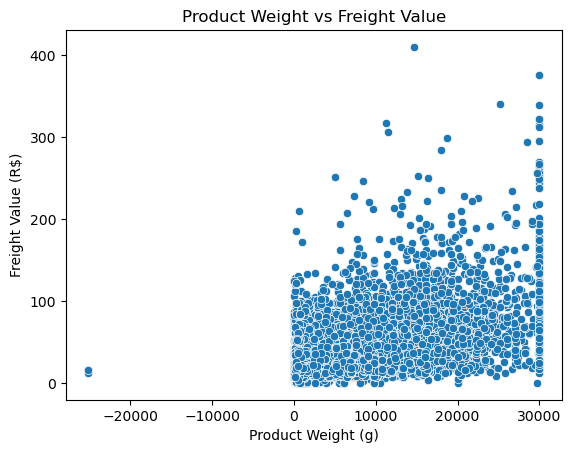

In [13]:
# Visualize
sns.scatterplot(x='product_weight_g', y='freight_value', data=df_clean)
plt.title('Product Weight vs Freight Value')
plt.xlabel('Product Weight (g)')
plt.ylabel('Freight Value (R$)')
plt.show()

In [14]:
# Remove outlier
df_clean = df_clean[(df_clean['product_weight_g'] > 0)]

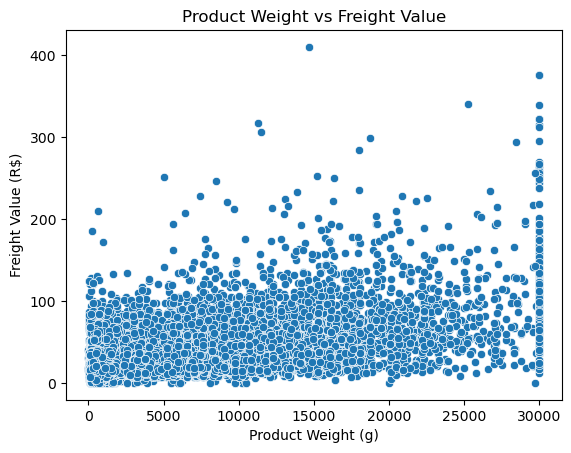

In [15]:
# Visualize again
sns.scatterplot(x='product_weight_g', y='freight_value', data=df_clean)
plt.title('Product Weight vs Freight Value')
plt.xlabel('Product Weight (g)')
plt.ylabel('Freight Value (R$)')
plt.show()

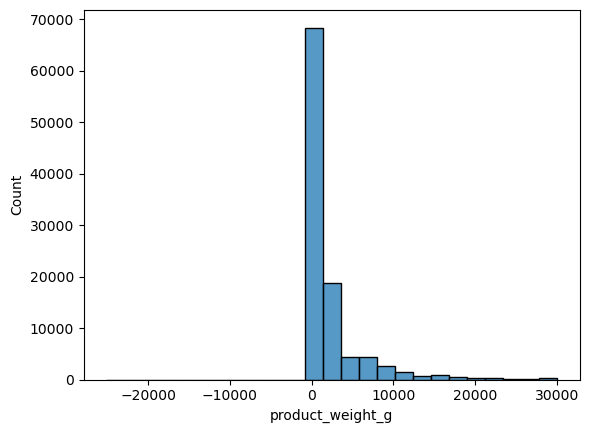

In [16]:
sns.histplot(df['product_weight_g'], bins=25) # Shows extreme values
plt.show()

## Check min, median, max

In [17]:
df_clean['product_weight_g'].min() # Check the min

2

In [18]:
df_clean['product_weight_g'].mean() # Check the mean

2122.8197691911987

In [19]:
df_clean['product_weight_g'].median() # Check the median

700.0

In [20]:
df_clean['product_weight_g'].max() # Check the max

30000

# Create arrays and data sets for Linear Regression

In [21]:
# Create NumPy arrays for modeling
X = df_clean['product_weight_g'].values.reshape(-1, 1)
y = df_clean['freight_value'].values.reshape(-1, 1)

In [22]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [23]:
# This is the regression object, which will be fit onto the training set.
model = LinearRegression() 

In [24]:
# Fit linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict values of Y using X
y_pred = model.predict(X_test)

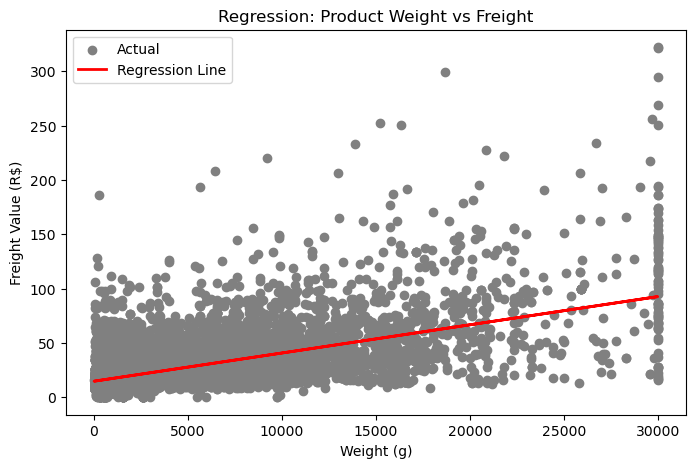

In [26]:
# Plot that shows the regression line from the model on the test set
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='gray', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression: Product Weight vs Freight')
plt.xlabel('Weight (g)')
plt.ylabel('Freight Value (R$)')
plt.legend()
plt.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_pred) # This is the mean squared error
r2 = r2_score(y_test, y_pred) # This is the R2 score. 

In [28]:
# Metrics
print(f'R² score: {r2_score(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')


R² score: 0.39
MSE: 161.10


In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,model.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00259501]]
Mean squared error:  161.1000489553478
R2 score:  0.3851172926224993


## Compare the predicted y values with the actual y values in a dataframe

In [30]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Freight': y_test.flatten(),      # flatten to convert from 2D to 1D
    'Predicted Freight': y_pred.flatten()
})

# Show the first few rows
comparison_df.head(10)

Actual Freight  Predicted Freight
0       18.299999          16.427967
1       15.100000          15.389962
2       14.520000          15.000711
3       19.320000          15.260212
4        9.060000          15.779214
5       16.990000          26.613385
6       14.690000          17.510086
7       17.030001          16.817218
8       21.389999          16.168466
9        8.720000          16.038715

# Compare how the regression fits the training set

In [31]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

In [32]:
# Calculate
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

In [33]:
print("RMSE (training set):", rmse_train)
print("R² score (training set):", r2_train)
print("Slope:",model.coef_)

RMSE (training set): 12.496978180932404
R² score (training set): 0.38173726717996603
Slope: [[0.00259501]]


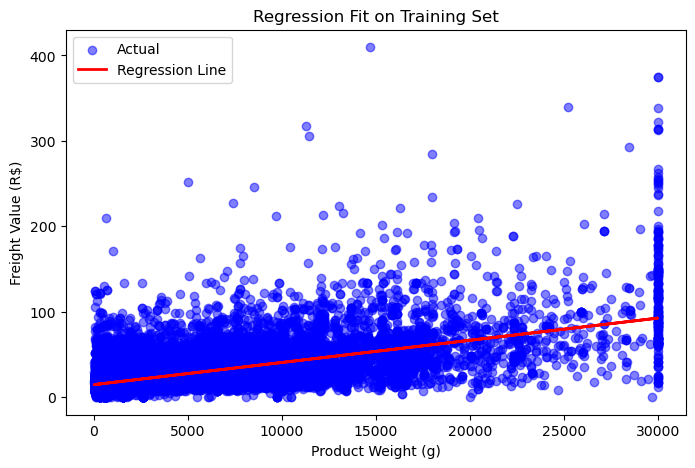

In [34]:
# Visualize training set results
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Actual')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Fit on Training Set')
plt.xlabel('Product Weight (g)')
plt.ylabel('Freight Value (R$)')
plt.legend()
plt.show()

## Model Evaluation: Training vs Test Set Comparison

| Metric        | Training Set | Test Set |
|---------------|--------------|----------|
| Slope         | 0.0026       | 0.0026   |
| RMSE (R$)     | 12.50        | 12.69    |
| R² Score      | 0.382        | 0.385    |



# Results

### The comparison between the trainins set and test set
    Slope is the same because the model was fit only once (on training data).
    RMSE is slightly higher on the test set but it is small, thus it indicates that the model is not overfitting.
    R² scores are very close on both sets which shows consistent model performance.

### Product Weight vs Freight Value
    Hypothesis: Heavier products will result in higher freight charges.
    After fitting a linear regression model with `product_weight_g` as the independent variable and `freight_value` as the dependent variable:
        The slope was 0.0026, meaning freight increases ~R$2.60 per kg.
        The R² score was 0.385, suggesting that weight alone moderately predicts freight value.
        Other variables likely influence freight cost, such as package dimensions, seller/customer location, and delivery type.
    This supports the hypothesis, but a multivariate model may improve predictions. Height was another correlation seen that affected weight, perhaps both included (somehow) could have a better prediction.  